In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz


In [2]:
from logic.graphanalyzer import GraphAnalyzer
from logic.network.networkloader import NetworkLoader
from logic.powerflowsettings import PowerFlowSettings

In [5]:
# path to the grid network RAW file
#casename = 'test/data/positive_seq/GS-4_prior_solution.RAW'
# casename = 'test/data/positive_seq/IEEE-14_prior_solution.RAW'
# casename = 'test/data/positive_seq/IEEE-118_prior_solution.RAW'
#casename = 'test/data/positive_seq/ACTIVSg500_prior_solution_fixed.RAW'
# casename = 'test/data/positive_seq/PEGASE-9241_flat_start.RAW'
#casename = 'test/data/positive_seq/PEGASE-13659_flat_start.RAW'
#casename = 'test/data/positive_seq/GS-4_stressed.RAW'
#casename = 'test/data/positive_seq/IEEE-14_stressed_1.RAW'
#casename = 'test/data/positive_seq/IEEE-14_stressed_2_fixed.RAW'
#casename = 'test/data/Taxonomy_Feeders/GC-12.47-1.glm'
# casename = 'test/data/three_phase/r4_25_00_1/node.glm'
#casename = 'test/data/ieee_four_bus/node.glm'
# casename = 'test/data/Taxonomy_Feeders/R1-12.47-2.glm'
# casename = 'test/data/experiments/rh_354_all_branches/rh_354_all_branches.glm'
# casename = 'test/data/experiments/R1-12.47-2-with-RH/R1-12.47-2-with-RH.glm'
# casename = 'test/data/three_phase/network_model_case1/node.glm'
# casename = 'test/data/experiments/network_model_case1_island/node.glm'
# casename = 'test/data/Taxonomy_Feeders/PGE_Models/GLD Simulation Primary/GLD Simulation Primary/AL0001/AL0001_glmfile_ts.glm'

# casename = 'test/data/experiments/R1-12.47-2-with-RHs/R1-12.47-2-with-RHs.glm'
# casename = 'test/data/experiments/R1-12.47-2-with-RHs/R1-12.47-2-with-RHs_large-islands.glm'
casename = 'test/data/experiments/R1-12.47-2-with-RHs/R1-12.47-2-with-RHs-working-copy.glm'

print("Analyzing network...")
print(f'Testcase: {casename}')

settings = PowerFlowSettings(debug=False, max_iters=50, flat_start=False, tx_stepping=False, voltage_limiting=False)

nw_loader = NetworkLoader(settings)
network = nw_loader.from_file(casename)

ga = GraphAnalyzer(network)

print(f"island count: {ga.get_island_count()}")

G = ga.G


Analyzing network...
Testcase: test/data/experiments/R1-12.47-2-with-RHs/R1-12.47-2-with-RHs-working-copy.glm
Loading network file: test/data/experiments/R1-12.47-2-with-RHs/R1-12.47-2-with-RHs-working-copy.glm


Failed to read spacing - using default positions


island count: 1


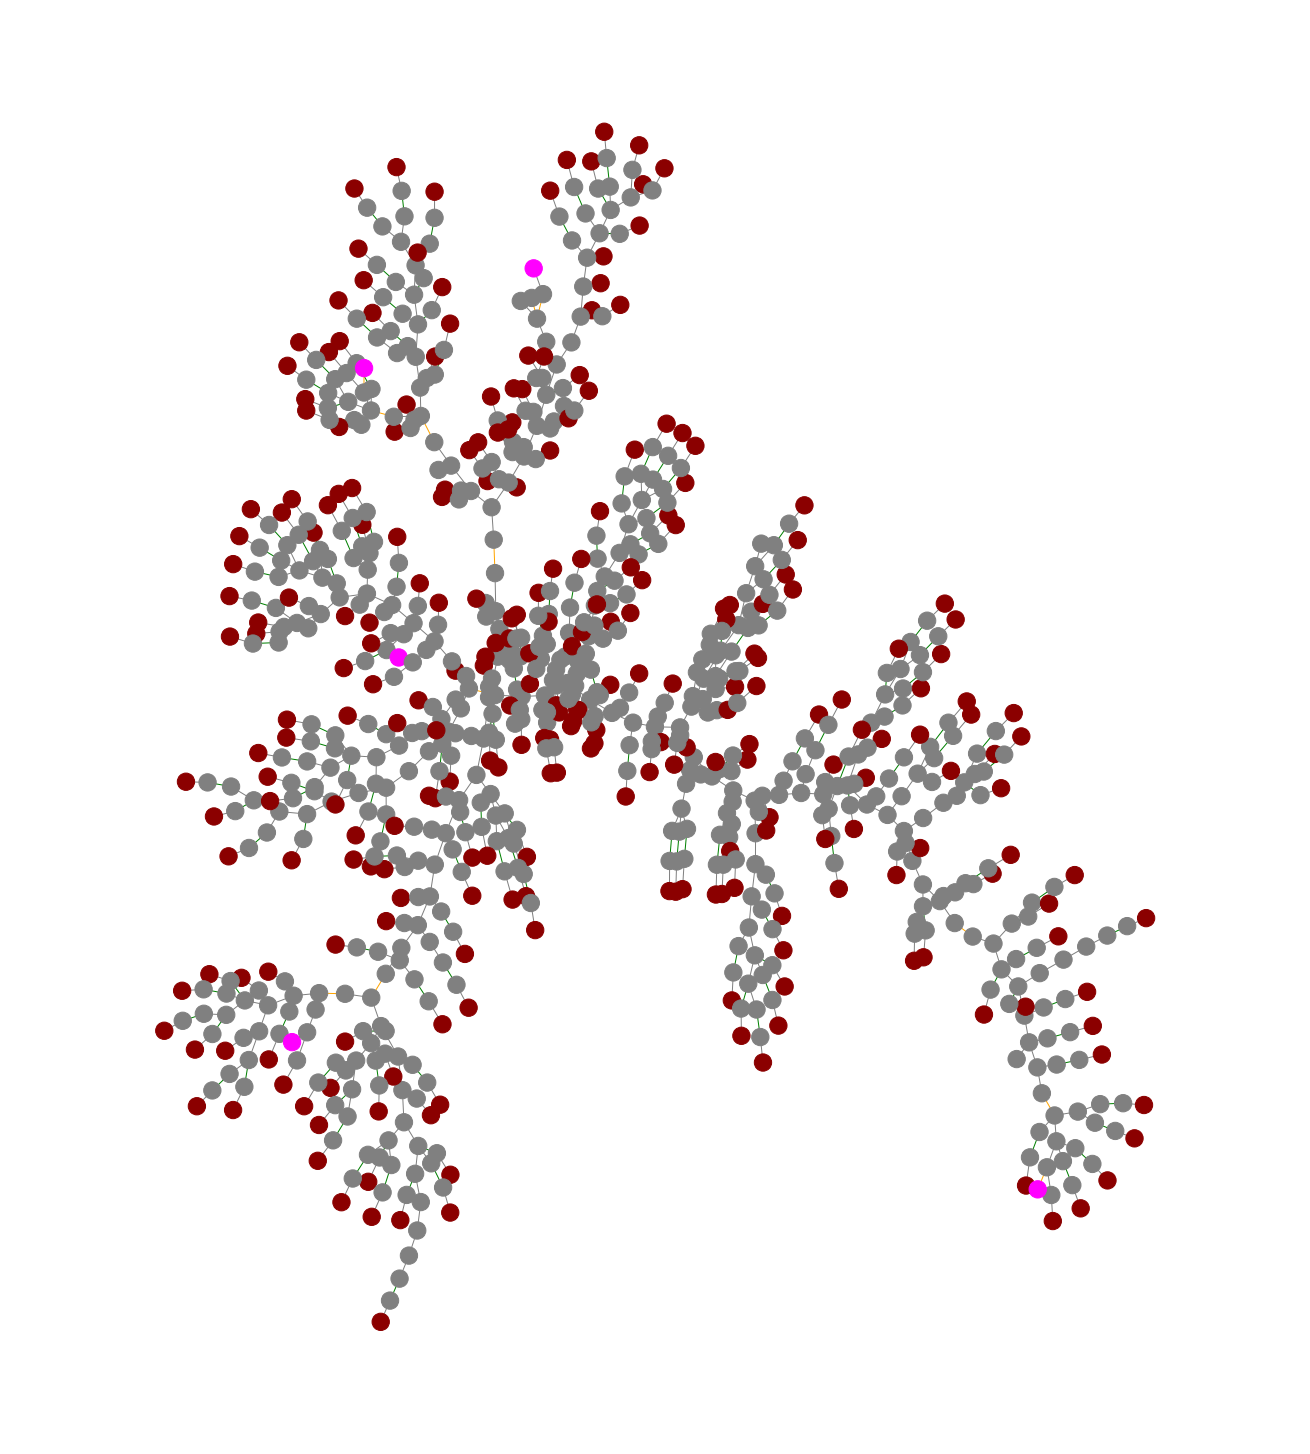

In [8]:
pos=nx.nx_agraph.graphviz_layout(G)
fig = plt.figure(1,figsize=(18,20)) 
nx.draw(G, pos, with_labels=False, node_color=ga.node_color.values(), edge_color=[ga.edge_color[edge] for edge in G.edges()], width=1, connectionstyle='arc3, rad = 0.1')
# nx.draw_networkx_labels(G, pos, ga.node_labels)
# nx.draw_networkx_edge_labels(
#     G, pos,
#     edge_labels=ga.edge_labels,
#     font_color='gray'
# )
plt.margins(x=0.1)

fig.savefig("taxonomy_feeder_layout.svg", bbox_inches="tight")